In [21]:
import torch
import math
import matplotlib.pyplot as plt
import numpy

In [22]:
from sinusoidal_gradient_descent.core import complex_oscillator

N = 1024
n = torch.arange(N)

#torch.random.manual_seed(1000)
starting_freq = torch.rand(1) * math.pi
predicted_z = torch.exp(1j * starting_freq)
predicted_z.detach_().requires_grad_(True)
print(f"Starting frequency: {predicted_z.angle().abs().item():.3f}")

sig = 0.5

target_freq = torch.tensor(0.36)
target_signal = torch.cos(target_freq * n) + sig**2 * torch.randn(n.shape)



criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD([predicted_z], lr=3e-4)
z_hist = torch.complex(torch.zeros(5000,1),torch.zeros(5000,1))
for step in range(5000):
    z_hist[step] = predicted_z
    predicted_signal = complex_oscillator(predicted_z, N=N, reduce=True)
    loss = criterion(predicted_signal, target_signal)
    optimiser.zero_grad()
    loss.backward()
    predicted_z.grad = predicted_z.grad / predicted_z.grad.abs()
    optimiser.step()

    if (step + 1) % 1000 == 0:
        print(f"--- Step: {step + 1} ---")
        print(f"Predicted frequency: {predicted_z.angle().abs().item():.3f}")
        print(f"Target frequency: {target_freq.item():.3f}")


Starting frequency: 1.364
--- Step: 1000 ---
Predicted frequency: 1.262
Target frequency: 0.360
--- Step: 2000 ---
Predicted frequency: 0.852
Target frequency: 0.360
--- Step: 3000 ---
Predicted frequency: 0.408
Target frequency: 0.360
--- Step: 4000 ---
Predicted frequency: 0.359
Target frequency: 0.360
--- Step: 5000 ---
Predicted frequency: 0.360
Target frequency: 0.360


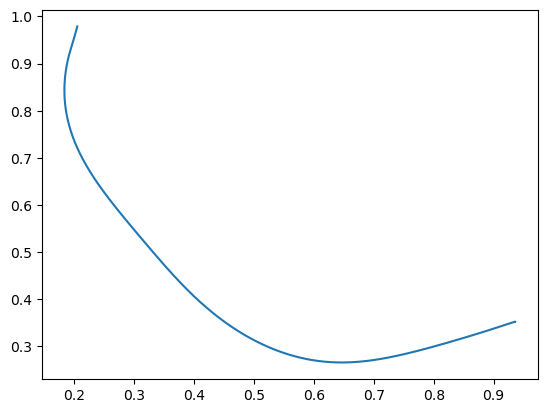

tensor([0.2050+0.9788j])
tensor([0.9361+0.3524j], requires_grad=True)


In [23]:
plt.plot(torch.real(z_hist).detach().numpy(),torch.imag(z_hist).detach().numpy())
plt.show()

print(torch.exp(1j * starting_freq))
print(predicted_z)

torch.Size([100])


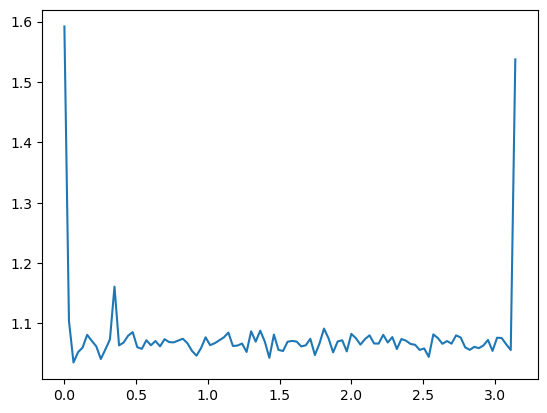

In [24]:
frange = torch.linspace(0,1,100)*math.pi

print(frange.shape)
loss_hist = []
for i in range(frange.shape[0]):
    predicted_z = torch.exp(1j * frange[i])

    predicted_signal = complex_oscillator(predicted_z, N=N)
    loss_hist.append(criterion(predicted_signal, target_signal))

plt.plot(frange,loss_hist)
plt.show()

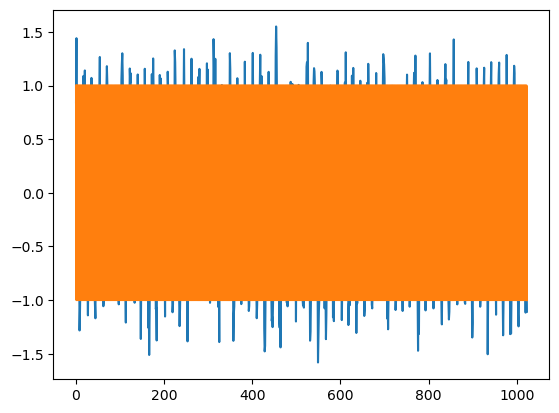

In [25]:
plt.plot(target_signal)
plt.plot(predicted_signal.detach().numpy())
plt.show()